# Image Filtering

## OpenCV



In [1]:
import cv2 as cv # OpenCV
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [16, 9]

import numpy.testing as npt
import os

# %matplotlib qt
# %matplotlib inline

## Basic IO
* 이미지 읽기: imread
* 이미지 쓰기: imwrite

In [2]:
# TODO: 이미지 읽기
img = cv.imread('tmp.png')

if img is None:
    raise RuntimeError("Could not read the image.")

# TODO: 이미지 쓰기


assert os.path.exists('tmp.png')

### Show Image using matplotlib

OpenCV는 컬러 이미지를 BGR로 불러옵니다. 때문에 RGB 형식을 사용하는 라이브러리를 OpenCV와 같이 사용하려면 BGR 이미지를 RGB 형식으로 바꿔야 합니다.

(<matplotlib.axes._subplots.AxesSubplot at 0x7f5a477a9b80>,
 Text(0.5, 1.0, 'RGB'))

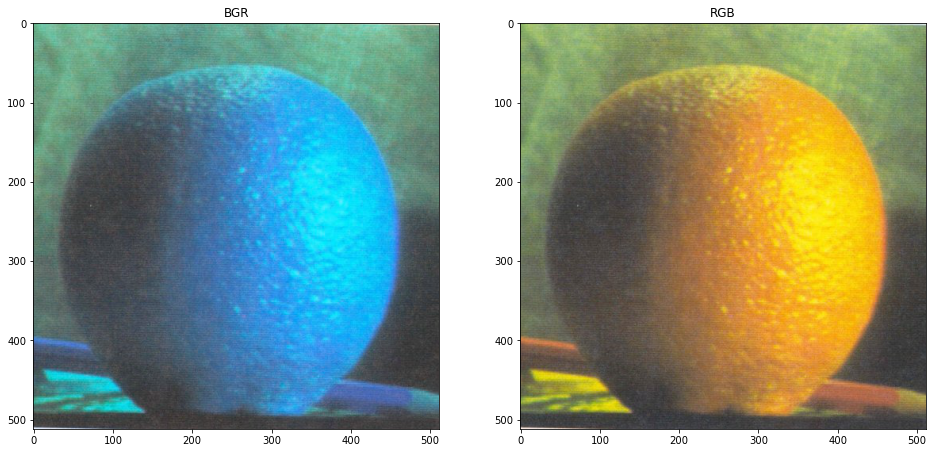

In [3]:

# show image using matplotlib
plt.subplot(1,2,1), plt.imshow(img), plt.title('BGR')
plt.subplot(1,2,2), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)), plt.title('RGB') # BGR 이미지를 RGB 형식으로 바꿔야 합니다.

### Show Image using OpenCV

OpenCV는 자체적으로 GUI 기능이 있어 이미지를 바로 표시 할 수 있습니다.

In [4]:
# TODO: show image using OpenCV
cv.imshow('test', img)

# 아무키나 누르면 창을 닫습니다.
# 주의: OpenCV 창을 닫을때 닫기 버튼을 누르지 마세요. 파이선이 정지되는 문제가 있습니다.
k = cv.waitKey(0)
cv.destroyAllWindows()

## Image Filters

* filter2D
    * OpenCV는 convolution 함수가 없고 correlation 함수만 존재

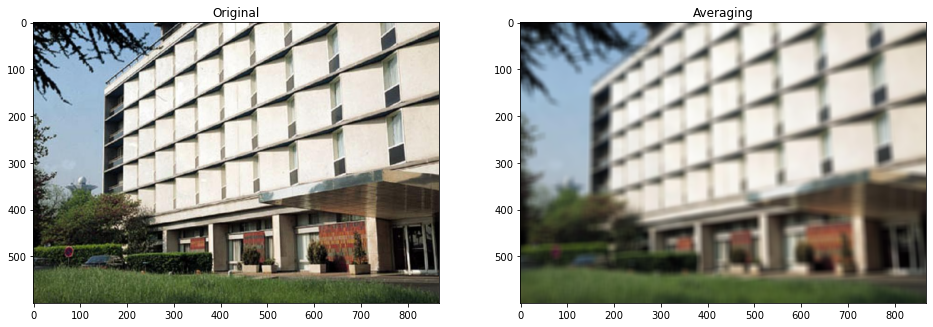

In [5]:
img = cv.imread('building.jpg')
kernel = np.ones((15,15),np.float32)/(15*15)

# TODO 이미지 필터링하기
dst1 = cv.filter2D(img, -1, kernel)
# ----------------------------------------------------------------------------

plt.subplot(1,2,1),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)),plt.title('Original')
plt.subplot(1,2,2),plt.imshow(cv.cvtColor(dst1, cv.COLOR_BGR2RGB)),plt.title('Averaging')
plt.show()

### Box filter
* 박스 모양의 필터

error: OpenCV(4.4.0) /tmp/pip-req-build-vu_aq9yd/opencv/modules/imgproc/src/color.simd_helpers.hpp:94: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<1>; VDcn = cv::impl::{anonymous}::Set<3, 4>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Unsupported depth of input image:
>     'VDepth::contains(depth)'
> where
>     'depth' is 6 (CV_64F)


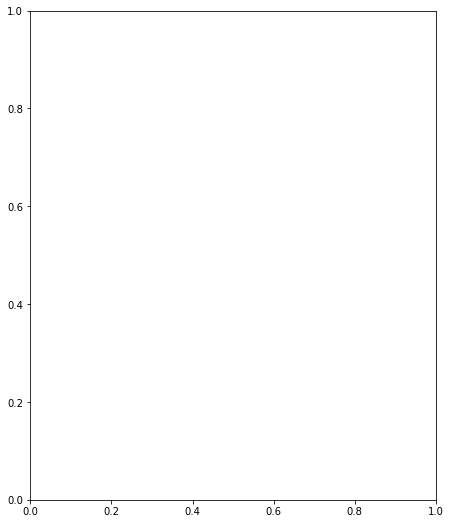

In [35]:
# TODO: 크기가 7인 박스필터 만들어 필터링하기
N = 7
kernel = np.ones((N,N),np.float32)/(N**2)

avg = cv.filter2D(img, -1, kernel)
# ----------------------------------------------------------------------------

plt.subplot(1,2,1),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)),plt.title('Original')
plt.subplot(1,2,2),plt.imshow(cv.cvtColor(avg, cv.COLOR_BGR2RGB)),plt.title('Averaging')
plt.show()

# Test case
ref = cv.imread("box7.png")
npt.assert_almost_equal(avg,ref)

### Other filters

* 그대로 이미지가 변경되지 않는 필터 (unchanged)
* 이미지를 왼쪽으로 10 픽셀을 이동시키는 필터 (shift to left)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0.

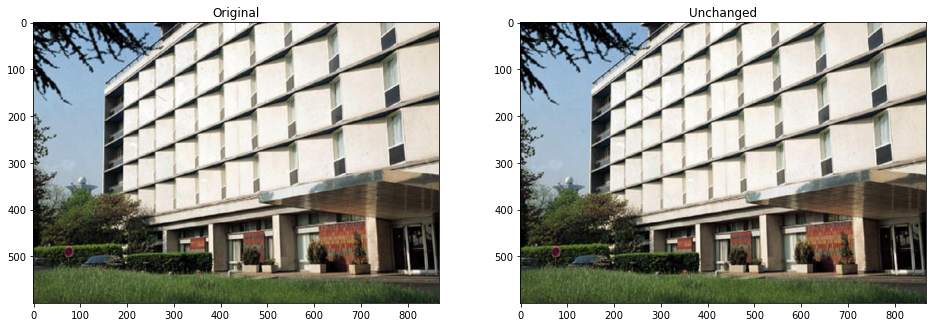

In [25]:
# TODO: 그대로 이미지가 나오는 필터링 구현하기
N = 10
kernel = np.zeros((2* N + 1,2 * N + 1),np.float32)
kernel[N,N] = 1
print(kernel)

unchanged = cv.filter2D(img, -1, kernel) # filter 2D를 사용하세요
# ----------------------------------------------------------------------------

plt.subplot(1,2,1),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)),plt.title('Original')
plt.subplot(1,2,2),plt.imshow(cv.cvtColor(unchanged, cv.COLOR_BGR2RGB)),plt.title('Unchanged')
plt.show()

# Test case
ref = img
npt.assert_almost_equal(unchanged,ref)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0.

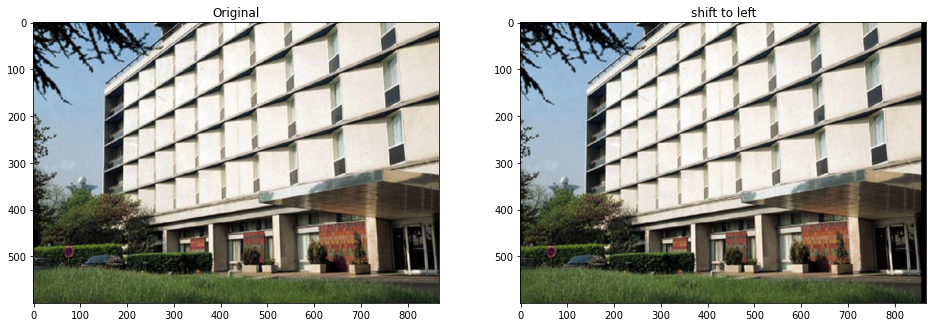

AssertionError: 
Arrays are not almost equal to 7 decimals

Mismatched elements: 298749 / 1562400 (19.1%)
Max absolute difference: 255
Max relative difference: 255.
 x: array([[[ 8,  4,  3],
        [ 9,  5,  4],
        [ 9,  7,  7],...
 y: array([[[ 8,  4,  3],
        [ 9,  4,  5],
        [11,  6,  7],...

In [27]:
# TODO: 이미지를 왼쪽으로 10 픽셀을 이동시키는 필터 구현하기
N = 10
kernel = np.zeros((2 * N + 1,2 * N + 1),np.float32)
kernel[N,2 * N] = 1
print(kernel)

shifted = cv.filter2D(img,-1,kernel,borderType=cv.BORDER_CONSTANT) # 이미지 보더 부분은 0으로 채워지게 설정
# ----------------------------------------------------------------------------

plt.subplot(1,2,1),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)),plt.title('Original')
plt.subplot(1,2,2),plt.imshow(cv.cvtColor(shifted, cv.COLOR_BGR2RGB)),plt.title('shift to left')
plt.show()


# Test case
ref = cv.imread("shifted10.png")
npt.assert_almost_equal(shifted,ref)

### Sharpening filter

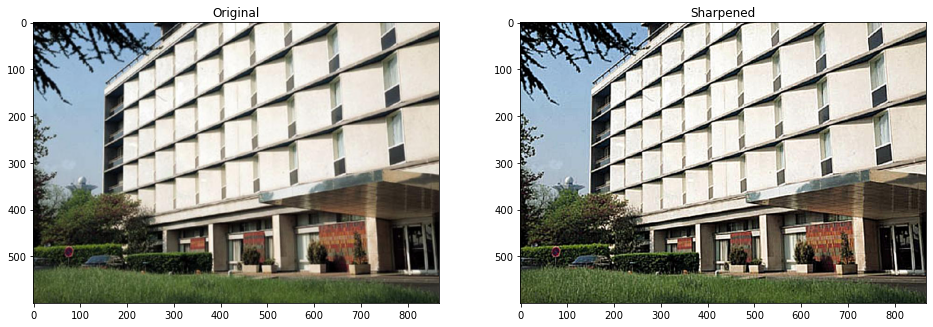

AssertionError: 
Arrays are not almost equal to 7 decimals

Mismatched elements: 393983 / 1562400 (25.2%)
Max absolute difference: 255
Max relative difference: 255.
 x: array([[[  0,   0,   7],
        [  0,   3,  11],
        [  2,   5,  11],...
 y: array([[[  0,   0,   7],
        [  0,   3,   9],
        [  2,   5,  11],...

In [29]:
# Quiz: sharpening 구현
N = 7  # 박스 필터의 크기는 7으로 할 것
kernel = np.zeros((N,N),np.float32)
kernel[N//2,N//2] = 2
kernel -= np.ones((N,N),np.float32)/(N**2)


sharpned = cv.filter2D(img, -1, kernel)
# ----------------------------------------------------------------------------

plt.subplot(1,2,1),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)),plt.title('Original')
plt.subplot(1,2,2),plt.imshow(cv.cvtColor(sharpned, cv.COLOR_BGR2RGB)),plt.title('Sharpened')
plt.show()

# Test case
ref = cv.imread("sharpned7.png")
npt.assert_almost_equal(sharpned,ref)

### Gaussian filter

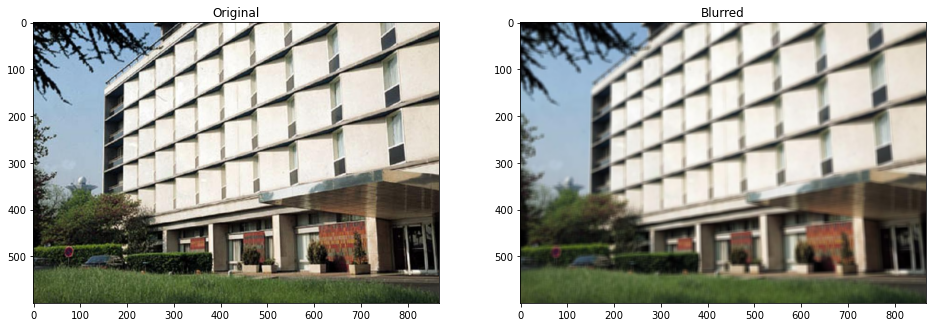

AssertionError: 
Arrays are not almost equal to 2 decimals

Mismatched elements: 1230537 / 1562400 (78.8%)
Max absolute difference: 255
Max relative difference: 255.
 x: array([[[  2,   0,   2],
        [  2,   0,   2],
        [  2,   0,   2],...
 y: array([[[  1,   1,   4],
        [  1,   1,   4],
        [  1,   1,   3],...

In [32]:

# Quiz: gaussian filter를 구현, cv.GaussianBlur 를 사용하지마세요.
sigma = 2.0 # sigma는 2.0로 할것
N = 7 # 필터 크기를 7로 할것
# 커널의 합이 1이 되야 함


def gaussian(i, j, sigma):
    return 1 / (2 * np.pi * sigma**2) * np.exp((i**2 + j**2) / (-2 * sigma**2))

kernel = np.zeros((N,N),np.float32)
total = 0
for x in range(N):
    for y in range(N):
        i = x - N//2
        j = y - N//2
        kernel[i,j] = gaussian(i, j, sigma)
        total += kernel[i,j]
        
kernel /= total
# ----------------------------------------------------------------------------

blurred = cv.filter2D(img,-1,kernel)
# blurred = cv.GaussianBlur(img,(N,N),sigma,sigma)

plt.subplot(1,2,1),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB)),plt.title('Original')
plt.subplot(1,2,2),plt.imshow(cv.cvtColor(blurred, cv.COLOR_BGR2RGB)),plt.title('Blurred')
plt.show()


# Test case
ref = cv.imread("gaussian.png")
npt.assert_almost_equal(blurred,ref, decimal=2)


### Sobel filter and Image Gradient

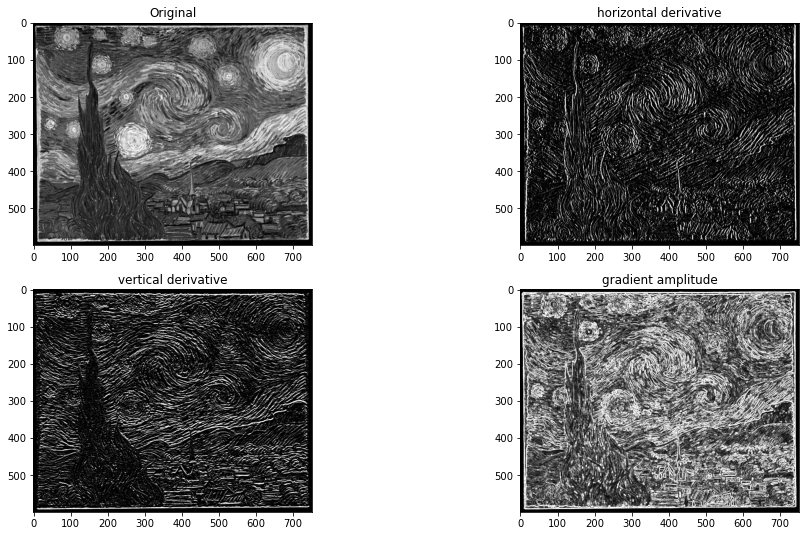

In [33]:
img = cv.imread('starry_night.jpg')
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY).astype(np.float) / 255


# Quiz: Sobel filter를 구현하여 image gradient 구하기
# horizontal derivative, vertical derivative, gradient amplitude를 구하세요

fx = np.dot(np.asmatrix([1,2,1], np.float32).T, np.asmatrix([1,0,-1], np.float32))
fy = np.dot(np.asmatrix([1,0,-1], np.float32).T, np.asmatrix([1,2,1], np.float32))
dx = cv.filter2D(img, -1, fx)
dy = cv.filter2D(img, -1, fy)
amp = np.sqrt(dx * dx + dy * dy) 

# --------------------------------


dx  = (255*np.clip(dx,0.0,1.0)).astype(np.uint8)
dy = (255*np.clip(dy,0.0,1.0)).astype(np.uint8)
amp = (255*np.clip(amp,0.0,1.0)).astype(np.uint8)

plt.subplot(2,2,1),plt.imshow(img, cmap='gray'),plt.title('Original')
plt.subplot(2,2,2),plt.imshow(dx, cmap='gray'),plt.title('horizontal derivative')
plt.subplot(2,2,3),plt.imshow(dy, cmap='gray'),plt.title('vertical derivative')
plt.subplot(2,2,4),plt.imshow(amp, cmap='gray'),plt.title('gradient amplitude')
plt.show()


# Test case
ref = cv.imread("dx.png", cv.IMREAD_UNCHANGED)
npt.assert_almost_equal(dx,ref, decimal=2)

ref = cv.imread("dy.png", cv.IMREAD_UNCHANGED)
npt.assert_almost_equal(dy,ref, decimal=2)

ref = cv.imread("amp.png", cv.IMREAD_UNCHANGED)
npt.assert_almost_equal(amp,ref, decimal=2)

